In [0]:
%matplotlib inline

In [0]:
import numpy as np
from matplotlib import pyplot as plt


In [0]:
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]

In [0]:
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_p(x):
  return sigmoid(x)*(1-sigmoid(x))

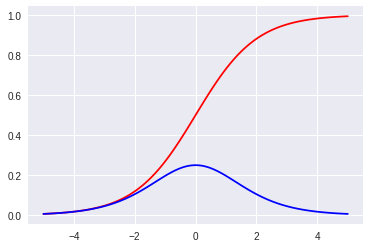

In [18]:
T = np.linspace(-5, 5, 100)
Y = sigmoid(T)
Y_p = sigmoid_p(T)
plt.plot(T, Y, c="r")
plt.plot(T, Y_p, c="b")

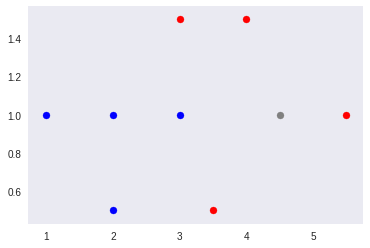

In [39]:
def vis_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')

vis_data()

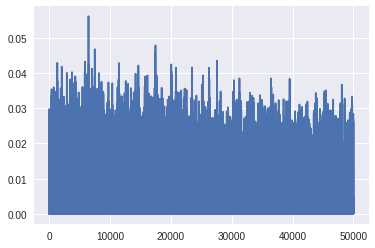

In [36]:
learning_rate = 0.2
costs = []


for x in range(50000):
  ri = np.random.randint(len(data))
  point = data[ri]
  
  z = point[0]*w1 + point[1]*w2 + b
  
  pred = sigmoid(z)
  
  target = point[2]
  cost = np.square(pred - target)

  costs.append(cost)
  
  dcost_pred = 2*(pred - target)
  dpred_dz = sigmoid_p(z)
  dz_dw1 = point[0]
  dz_dw2 = point[1]
  dz_db = 1
  
  dcost_dw1 = dcost_pred*dpred_dz*dz_dw1
  dcost_dw2 = dcost_pred*dpred_dz*dz_dw2
  dcost_db = dcost_pred*dpred_dz*dz_db
  
  w1 -= learning_rate*dcost_dw1
  w2 -= learning_rate*dcost_dw2
  b -= learning_rate*dcost_db
  
plt.plot(costs)

In [37]:
# predict what the myster flower is!

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.9999999999113331
close to 0 -> blue, close to 1 -> red


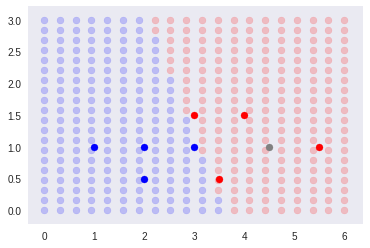

In [40]:
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# plot points over network predictions
# you should see a split, with half the predictions blue
# and the other half red.. nicely predicting each data point!
vis_data()

In [0]:
import os


In [0]:
def which_flower(l, w):
  z = w1 * l + w2 * w + b
  pred = sigmoid(z)
  
  if pred<0.5:
    os.system("say blue")
    print('blue')
  else:
    os.system("say red")
    print('red')
    

In [55]:
which_flower(np.pi/2, np.pi/2)

blue
